In [522]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [523]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [524]:
#データフレームへの読み込み
df = pd.read_csv('/Users/rukasumichika/最終課題/data/LengthOfStay.csv')

In [525]:
from ydata_profiling import ProfileReport

In [526]:
# データの最初の5行を表示
print(df.head())

   eid       vdate rcount gender  dialysisrenalendstage  asthma  irondef  \
0    1   8/29/2012      0      F                      0       0        0   
1    2   5/26/2012     5+      F                      0       0        0   
2    3   9/22/2012      1      F                      0       0        0   
3    4    8/9/2012      0      F                      0       0        0   
4    5  12/20/2012      0      F                      0       0        0   

   pneum  substancedependence  psychologicaldisordermajor  ...     glucose  \
0      0                    0                           0  ...  192.476918   
1      0                    0                           0  ...   94.078507   
2      0                    0                           0  ...  130.530524   
3      0                    0                           0  ...  163.377028   
4      1                    0                           1  ...   94.886654   

   bloodureanitro  creatinine        bmi  pulse  respiration  \
0         

In [527]:
# データの統計情報を確認
df.describe()

,eid,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,50000.500000,0.036420,0.035270,0.094940,0.039450,0.063060,0.239040,0.051660,0.049390,0.004790,...,10.177455,137.891397,141.963384,14.097185,1.099350,29.805759,73.444720,6.493768,2.123310,4.00103
std,28867.657797,0.187334,0.184462,0.293134,0.194664,0.243072,0.426499,0.221341,0.216682,0.069044,...,5.353131,2.999669,29.992996,12.952454,0.200262,2.003769,11.644555,0.568473,2.050641,2.36031
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,124.912632,-1.005927,1.000000,0.219770,21.992683,21.000000,0.200000,0.000000,1.00000
25%,25000.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,135.871062,121.682383,11.000000,0.964720,28.454235,66.000000,6.500000,1.000000,2.00000
50%,50000.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.400000,137.887151,142.088545,12.000000,1.098764,29.807516,73.000000,6.500000,1.000000,4.00000
75%,75000.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.500000,139.912885,162.180996,14.000000,1.234867,31.156885,81.000000,6.500000,3.000000,6.00000
max,100000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,245.900000,151.387283,271.444277,682.500000,2.035202,38.935293,130.000000,10.000000,10.000000,17.00000


In [528]:
# データの情報を確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

In [529]:
# 'eid', 'vdate', 'discharged'を除外する
df_filtered = df.drop(columns=['eid', 'vdate', 'discharged'])
print(df_filtered.columns)

Index(['rcount', 'gender', 'dialysisrenalendstage', 'asthma', 'irondef',
       'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit',
       'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine',
       'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'facid',
       'lengthofstay'],
      dtype='object')


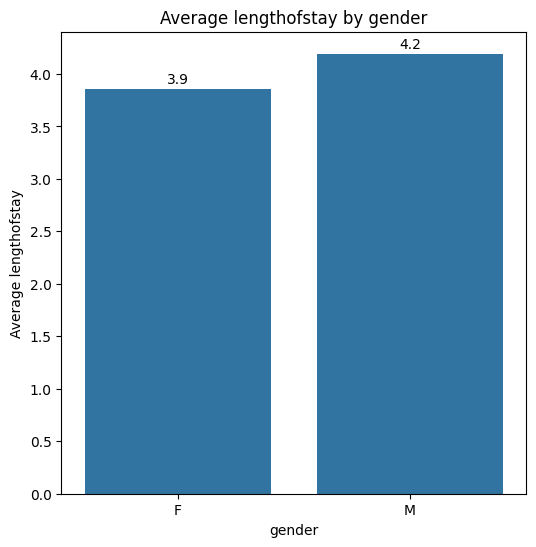

In [530]:
# gender ごとの lengthofstay の平均を計算
gender_distinction = df_filtered.groupby('gender')['lengthofstay'].mean().reset_index()

# グラフの描画
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x='gender', y='lengthofstay', data=gender_distinction, ax=ax)
ax.set_title('Average lengthofstay by gender')
ax.set_xlabel('gender')
ax.set_ylabel('Average lengthofstay')

# 各バーの上に数値ラベルを追加
for index, row in gender_distinction.iterrows():
    ax.text(index, row['lengthofstay'] + 0.05, round(row['lengthofstay'], 1), ha="center")

# グラフを表示
plt.show()

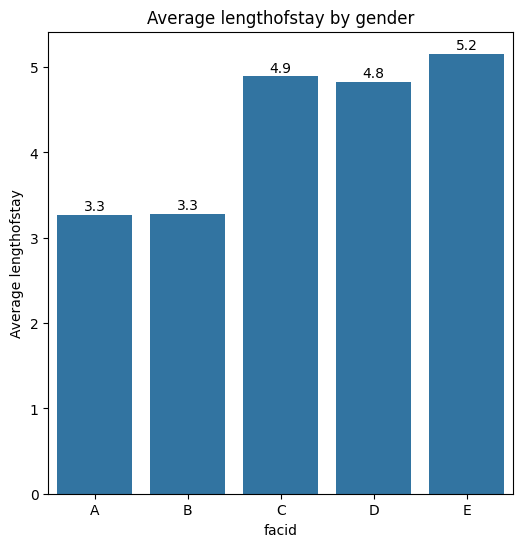

In [531]:
# facid ごとの lengthofstay の平均を計算
facid_distinction = df_filtered.groupby('facid')['lengthofstay'].mean().reset_index()

# グラフの描画
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x='facid', y='lengthofstay', data=facid_distinction, ax=ax)
ax.set_title('Average lengthofstay by gender')
ax.set_xlabel('facid')
ax.set_ylabel('Average lengthofstay')

# 各バーの上に数値ラベルを追加
for index, row in facid_distinction.iterrows():
    ax.text(index, row['lengthofstay'] + 0.05, round(row['lengthofstay'], 1), ha="center")

# グラフを表示
plt.show()

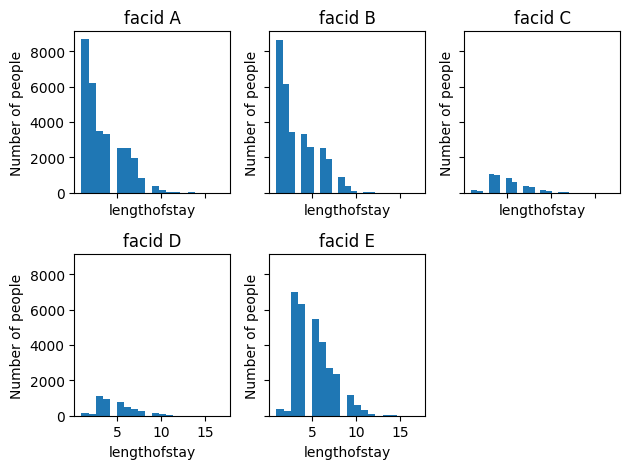

In [532]:
# 2行3列のプロット領域を作成（x軸とy軸の値を揃える）
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

# facidごとのヒストグラムを作成
facilities = ['A', 'B', 'C', 'D', 'E']

for i, facid in enumerate(facilities):
    row, col = divmod(i, 3)  # facidごとにサブプロットの位置を決定
    axs[row, col].hist(df_filtered[df_filtered['facid'] == facid]['lengthofstay'], bins=20) # lengthofstayの最大値17を参考
    axs[row, col].set_title(f'facid {facid}')
    axs[row, col].set_xlabel('lengthofstay')
    axs[row, col].set_ylabel('Number of people')

# 不要なプロットを削除する
fig.delaxes(axs[1, 2])

# レイアウト調整して表示
plt.tight_layout()
plt.show()

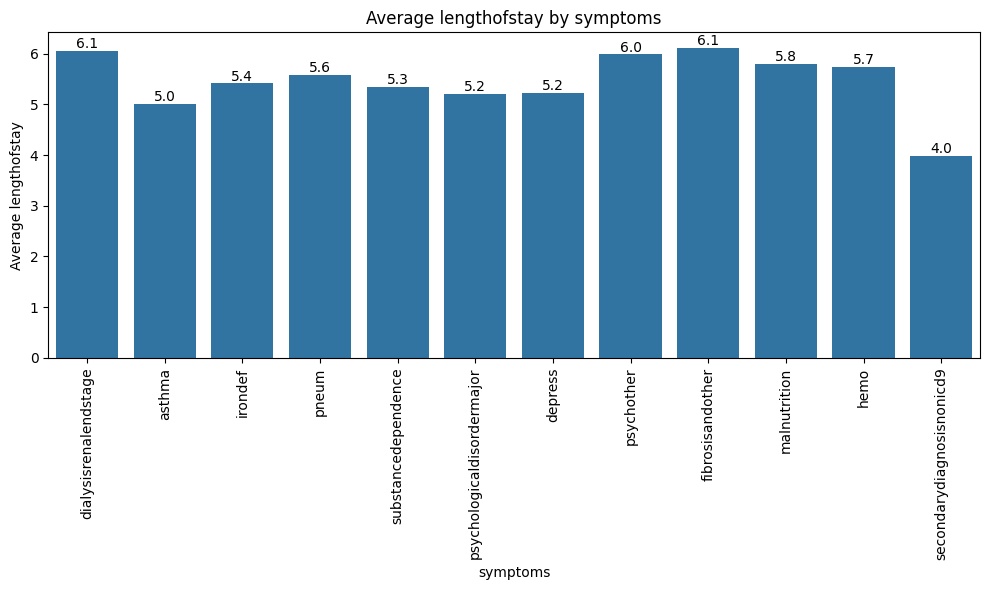

In [533]:
# 症状の列を抜き出す
symptoms = df_filtered[['dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'secondarydiagnosisnonicd9']]

# 各症状を持つ患者の平均入院日数を計算
symptom_distinction = []

for symptom in symptoms.columns:
    avg_lengthofstay = df_filtered.loc[df_filtered[symptom] == 1, 'lengthofstay'].mean()  
    symptom_distinction.append((symptom, avg_lengthofstay))

# データフレームに変換
symptom_distinction = pd.DataFrame(symptom_distinction, columns=['symptom', 'average_lengthofstay'])

# グラフの描画
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='symptom', y='average_lengthofstay', data=symptom_distinction)
plt.title('Average lengthofstay by symptoms')
plt.xlabel('symptoms')
plt.ylabel('Average lengthofstay')
plt.xticks(rotation=90)

# 各バーの上に数値ラベルを追加
for index, row in symptom_distinction.iterrows():  
    ax.text(index, row['average_lengthofstay'] + 0.05, round(row['average_lengthofstay'], 1), ha="center")

# レイアウト調整して表示
plt.tight_layout()
plt.show()

In [534]:
# 'rcount' 列で '5+' を 5 に変換
df_filtered['rcount'] = df_filtered['rcount'].replace('5+', 5)

# object型をint型に変換
df_filtered['rcount'] = df_filtered['rcount'].astype(int)

# rcount列に含まれる値とタイプ型を確認
print(df_filtered['rcount'].unique())
print(df_filtered['rcount'].dtype)

[0 5 1 3 4 2]
int64


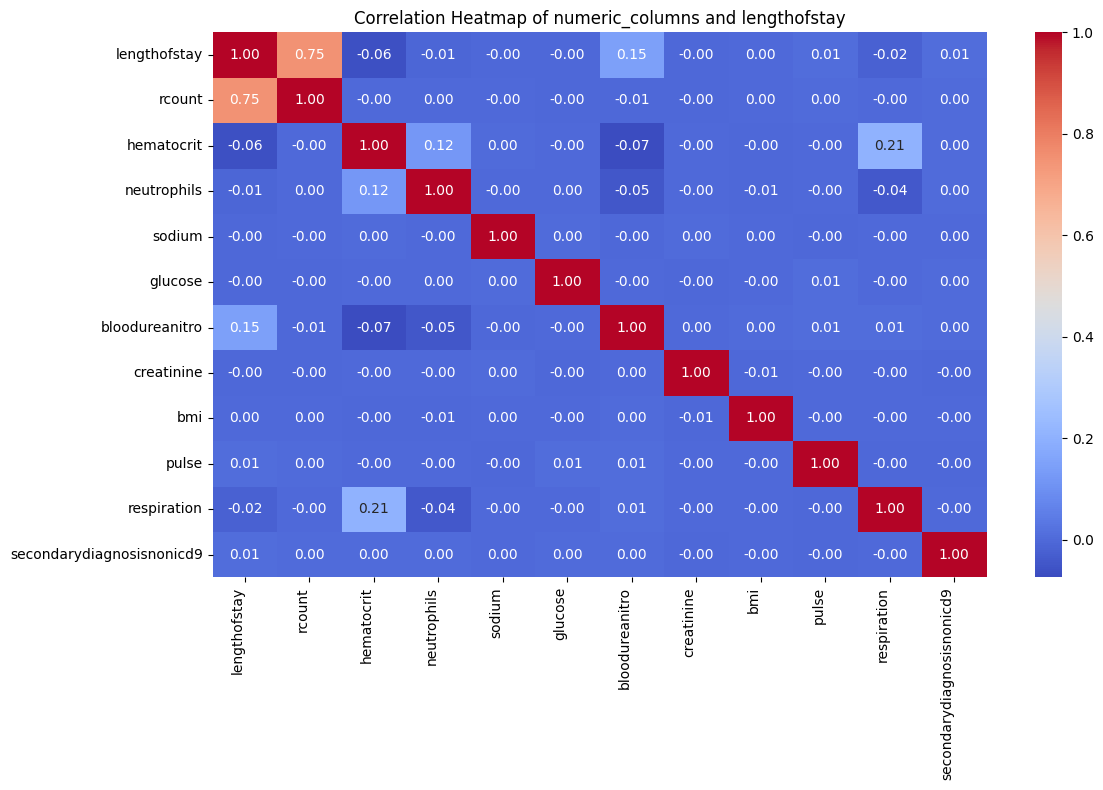

In [535]:
# 数字列を抜き出す
numeric_columns = df_filtered[['lengthofstay', 'rcount', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9']]

# 相関行列を作成
corr_matrix = numeric_columns.corr()

# ヒートマップ作成
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of numeric_columns and lengthofstay')
plt.xticks(rotation=90, ha='right')  # x軸ラベルを45度回転して見やすくする

# レイアウト調整して表示
plt.tight_layout()
plt.show()

In [536]:
# genderに対してOne-Hotエンコーディングを実装
encoded = pd.get_dummies(df_filtered['gender'], prefix='gender')

# int型に変換
encoded = encoded.astype(int)

# 元のデータフレームに結合
df_concat = pd.concat([df_filtered, encoded], axis=1)

# 'gender' 列を削除
df_concat.drop('gender', axis=1, inplace=True)

# 結果を確認
df_concat.head()

,rcount,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,facid,lengthofstay,gender_F,gender_M
0,0,0,0,0,0,0,0,0,0,0,...,12.0,1.390722,30.432418,96,6.5,4,B,3,1,0
1,5,0,0,0,0,0,0,0,0,0,...,8.0,0.943164,28.460516,61,6.5,1,A,7,1,0
2,1,0,0,0,0,0,0,0,0,0,...,12.0,1.065750,28.843812,64,6.5,2,B,3,1,0
3,0,0,0,0,0,0,0,0,0,0,...,12.0,0.906862,27.959007,76,6.5,1,A,1,1,0
4,0,0,0,0,1,0,1,0,0,0,...,11.5,1.242854,30.258927,67,5.6,2,E,4,1,0


In [537]:
# facidに対してOne-Hotエンコーディングを実装
encoded = pd.get_dummies(df_concat['facid'], prefix='facid')

# bool型をint型に変換
encoded = encoded.astype(int)

# 元のデータフレームに結合
df_concat = pd.concat([df_concat, encoded], axis=1)

# 'facid' 列を削除
df_concat.drop('facid', axis=1, inplace=True)

# 結果を確認
df_concat.head()

,rcount,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,respiration,secondarydiagnosisnonicd9,lengthofstay,gender_F,gender_M,facid_A,facid_B,facid_C,facid_D,facid_E
0,0,0,0,0,0,0,0,0,0,0,...,6.5,4,3,1,0,0,1,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,6.5,1,7,1,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,6.5,2,3,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,6.5,1,1,1,0,1,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,5.6,2,4,1,0,0,0,0,0,1


In [538]:
from sklearn.model_selection import train_test_split

In [539]:
# 学習データとテストデータに分割
X = df_concat.drop(columns=['lengthofstay']).to_numpy()
y = df_concat['lengthofstay'].to_numpy()

In [540]:
# 比率7:3で学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70000, 29) (30000, 29) (70000,) (30000,)


In [541]:
# StandardScalerクラスのインスタンス化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [542]:
#　インデックスを確認
print(X_train.shape)
print(df_concat.drop(columns=['lengthofstay']).columns)

(70000, 29)
Index(['rcount', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum',
       'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit',
       'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine',
       'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'gender_F',
       'gender_M', 'facid_A', 'facid_B', 'facid_C', 'facid_D', 'facid_E'],
      dtype='object')


In [543]:
# 標準化したい特徴量を抽出
columns_to_scale = [0,12,13,14,15,16,17,18,19,20,21]

In [544]:
# X_trainから指定したを特徴量抽出
X_train_selected = X_train[:, columns_to_scale]

In [545]:
# StandardScalerを使って標準化
X_train_scaler = scaler.fit_transform(X_train_selected)

In [546]:
# 標準化した部分を代入
X_train_scaled = np.copy(X_train)  # 元のデータのコピーを作成
X_train_scaled[:, columns_to_scale] = X_train_scaler

# 結果を表示（形状を確認）
print(X_train_scaled.shape)

(70000, 29)


In [547]:
# 変換前(X_train)の状態
df_X_train = pd.DataFrame(X_train, columns=['rcount','dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'gender_F', 'gender_M', 'facidA', 'facidB', 'facidC', 'facidD', 'facidE'])
df_X_train.head()

,rcount,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,pulse,respiration,secondarydiagnosisnonicd9,gender_F,gender_M,facidA,facidB,facidC,facidD,facidE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60.0,6.5,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,87.0,6.5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,61.0,5.6,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,87.0,6.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,84.0,5.1,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [548]:
# 変換後(X_train_scaled)の状態
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=['rcount', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'gender_F', 'gender_M', 'facidA', 'facidB', 'facidC', 'facidD', 'facidE'])
df_X_train_scaled.head()

,rcount,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,pulse,respiration,secondarydiagnosisnonicd9,gender_F,gender_M,facidA,facidB,facidC,facidD,facidE
0,-0.722221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.152580,0.011740,-0.061181,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,-0.722221,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.161112,0.011740,-0.547790,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.722221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.066888,-1.573468,-0.061181,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.574156,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.161112,0.011740,-0.547790,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.722221,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.904035,-2.454139,0.912038,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [549]:
df_X_train_scaled.describe()

,rcount,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,pulse,respiration,secondarydiagnosisnonicd9,gender_F,gender_M,facidA,facidB,facidC,facidD,facidE
count,7.000000e+04,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,7.000000e+04,7.000000e+04,7.000000e+04,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,-3.847081e-17,0.036257,0.034929,0.095557,0.039329,0.062729,0.238771,0.051900,0.049929,0.005043,...,3.610572e-16,-2.314339e-17,-6.638499e-17,0.578100,0.421900,0.300357,0.300500,0.047229,0.044814,0.307100
std,1.000007e+00,0.186931,0.183600,0.293985,0.194377,0.242476,0.426336,0.221827,0.217799,0.070834,...,1.000007e+00,1.000007e+00,1.000007e+00,0.493866,0.493866,0.458417,0.458479,0.212129,0.206898,0.461295
min,-7.222208e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.980426e+00,-1.108471e+01,-1.034399e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.222208e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-6.384260e-01,1.173997e-02,-5.477899e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-7.222208e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.857990e-02,1.173997e-02,-5.477899e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.741561e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.469585e-01,1.173997e-02,4.254285e-01,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2.518721e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.160343e+00,6.176437e+00,3.831693e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [550]:
# X_testも同様に標準化
X_test_selected = X_test[:, columns_to_scale]
X_test_scaler = scaler.fit_transform(X_test_selected)

In [551]:
# 標準化した部分を代入
X_test_scaled = np.copy(X_test)  # 元のデータのコピーを作成
X_test_scaled[:, columns_to_scale] = X_test_scaler

# 結果を表示（形状を確認）
print(X_test_scaled.shape)

(30000, 29)


In [552]:
# 変換前(X_test)の状態
df_X_test = pd.DataFrame(X_test, columns=['rcount','dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'gender_F', 'gender_M', 'facidA', 'facidB', 'facidC', 'facidD', 'facidE'])
df_X_test.head()

,rcount,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,pulse,respiration,secondarydiagnosisnonicd9,gender_F,gender_M,facidA,facidB,facidC,facidD,facidE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,67.0,5.4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,83.0,6.5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,76.0,6.5,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,67.0,6.5,5.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51.0,6.5,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [553]:
# 変換後(X_test_scaled)の状態
df_X_test_scaled = pd.DataFrame(X_test_scaled, columns=['rcount', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'gender_F', 'gender_M', 'facidA', 'facidB', 'facidC', 'facidD', 'facidE'])
df_X_test_scaled.head()

,rcount,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,pulse,respiration,secondarydiagnosisnonicd9,gender_F,gender_M,facidA,facidB,facidC,facidD,facidE
0,-0.730574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.555165,-1.920166,-0.547795,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.082634,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.825864,0.009157,-0.547795,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.730574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.221664,0.009157,-0.547795,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,-0.730574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.555165,0.009157,1.412701,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.213247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.936195,0.009157,-0.547795,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [554]:
df_X_test_scaled.describe()

,rcount,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,pulse,respiration,secondarydiagnosisnonicd9,gender_F,gender_M,facidA,facidB,facidC,facidD,facidE
count,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,3.000000e+04,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.276608e-16,0.036800,0.036067,0.093500,0.039733,0.063833,0.239667,0.051100,0.048133,0.004200,...,1.032655e-16,-1.696302e-15,6.513308e-17,0.572533,0.427467,0.300333,0.299233,0.046433,0.045400,0.308600
std,1.000017e+00,0.188274,0.186459,0.291137,0.195335,0.244460,0.426887,0.220205,0.214051,0.064672,...,1.000017e+00,1.000017e+00,1.000017e+00,0.494719,0.494719,0.458411,0.457930,0.210425,0.208183,0.461923
min,-7.305743e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-4.525625e+00,-1.104060e+01,-1.037920e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.305743e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-6.414795e-01,9.157465e-03,-5.477954e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-7.305743e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.727916e-02,9.157465e-03,-5.477954e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.653064e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.532355e-01,9.157465e-03,4.324529e-01,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2.509127e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.882638e+00,6.147914e+00,3.863322e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [555]:
# 重回帰で分析
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [556]:
# 予測モデルの学習
model.fit(X_train_scaled, y_train)

LinearRegression()

In [557]:
# 学習データを用いて決定係数を算出
model.score(X_train_scaled, y_train)

0.7614013358246663

In [558]:
# テストデータを用いて決定係数を算出
model.score(X_test_scaled, y_test)

0.7634428403520678

In [559]:
# テストデータに対する予測
y_pred = model.predict(X_test_scaled)

In [560]:
# 二乗平均平方根誤差（RMSE）の値を算出
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

1.1483359957786603

In [561]:
# 平均絶対誤差(MAPE) の値を算出
np.mean(np.abs((y_test - y_pred) / y_test)) * 100

32.09155514862062

In [562]:
# 計算式の確認
print("係数:", model.coef_)
print("切片:", model.intercept_)

係数: [ 1.77390804e+00  7.34414282e-01  3.29956100e-01  3.24552660e-01
  4.38779104e-01  5.73885973e-01  7.68322523e-01  3.61286596e-01
  6.16685631e-01  7.63749827e-01  3.11482982e-01  1.23664956e+00
  1.99505034e-02  1.18860025e-01  2.26621094e-04  3.51502315e-03
  9.72477793e-02 -2.81329946e-03 -1.38769953e-03  3.06104762e-04
 -2.22060887e-02  1.47432395e-03 -5.37090879e+11 -5.37090879e+11
  2.10915691e+11  2.10915691e+11  2.10915691e+11  2.10915691e+11
  2.10915691e+11]
切片: 326175188402.4693


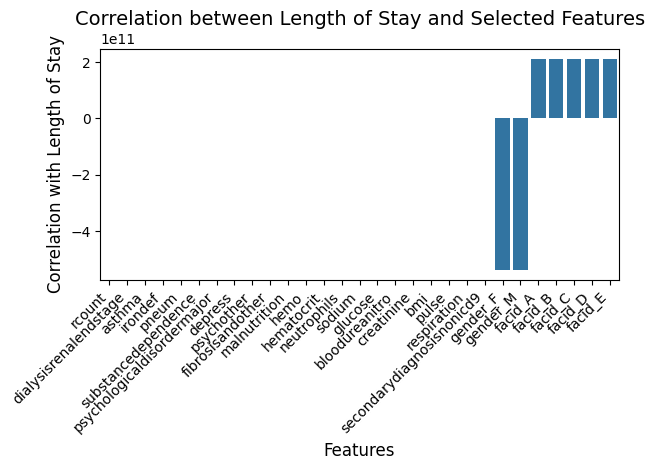

In [563]:
# 各要素が入院期間に与える影響度合い
sns.barplot(x = ['rcount', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9','gender_F', 'gender_M', 'facid_A', 'facid_B', 'facid_C', 'facid_D', 'facid_E'], y=model.coef_)

# グラフの設定
plt.title('Correlation between Length of Stay and Selected Features', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation with Length of Stay', fontsize=12)
plt.xticks(rotation=45, ha='right')  # x軸ラベルを45度回転して見やすくする
plt.tight_layout()  # レイアウトを自動調整
plt.show()

In [564]:
# DataFrame に変換
df = pd.DataFrame({
    'Actual': y_test,     # 実際の値
    'Predicted': y_pred   # 予測された値
})

# DataFrame を表示
df

,Actual,Predicted
0,1,1.661316
1,5,4.544128
2,2,2.312805
3,2,1.876099
4,5,5.223022
...,...,...
29995,10,6.774963
29996,3,3.199158
29997,7,6.424866
29998,1,1.765991
